# Импорт всякого


In [2]:
!pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Preparing metadata (setup.py) ... done


In [81]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import plot_model
import keras.utils as image

import tensorflow_datasets as tfds

import numpy as np

from google.colab import files

import zipfile
import requests
import io
from PIL import Image
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Dense, DepthwiseConv2D, BatchNormalization

# Набор данных объекты со снимков спутника


## Загрузка и подготовка данных

In [3]:
_URL = 'http://madm.dfki.de/files/sentinel/EuroSAT.zip'
path_to_zip = tf.keras.utils.get_file('EuroSAT.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'EuroSAT')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

94280567/94280567 [==============================] - 5s 0us/step


NotFoundError: ignored

не экстрактицо, ищем способ в internet
https://colab.research.google.com/github/e-chong/Remote-Sensing/blob/master/EuroSAT%20Land%20Cover%20Classification/EuroSAT%20Land%20Use%20and%20Land%20Cover%20Classification%20using%20Deep%20Learning.ipynb#scrollTo=L2X8WFJqS9xo

In [4]:
url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"

# скачиваем zip
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# извлекаем имя файла
txtfiles = []
for file in z.namelist():
  txtfiles.append(file)

# извлекаем только жпгшки
txtfiles = [x for x in txtfiles if ".jpg" in x]

# конвертим картинки в числа
XImages = np.zeros([len(txtfiles), 64, 64, 3])

i = 0
for pic in txtfiles:
  XImages[i] = np.asarray(Image.open(z.open(pic))).astype('uint8')/255
  print(i)
  i += 1

del r # чистим память
del z

# извлекаем названия картинок из чисел
labs = np.empty(len(txtfiles), dtype = 'S20')

i = 0
for label in txtfiles:
  labs[i] = label.split('/')[1]
  i += 1

# Меняем на integer
label_names, yLabels = np.unique(labs, return_inverse=True)

label_Dict = dict(zip(np.unique(yLabels), label_names))
print(label_Dict)
np.array(np.unique(yLabels, return_counts=True)).T

Выходные данные были обрезаны до нескольких последних строк (5000).
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066
22067
22068
22069
22070
22071
22072
22073
22074
22075
22076
22077
22078
22079
22080
22081
22082
22083
22084
22085
22086
22087
22088
22089
22090
22091
22092
22093
22094
22095
22096
22097
22098
22099
22100
22101
22102
22103
22104
22105
22106
22107
22108
22109
22110
22111
22112
22113
22114
22115
22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22129
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22143
22144
22145
22146
22147
22148
22149
22150
22151
22152
22153
22154
22155
22

array([[   0, 3000],
       [   1, 3000],
       [   2, 3000],
       [   3, 2500],
       [   4, 2500],
       [   5, 2000],
       [   6, 2500],
       [   7, 3000],
       [   8, 2500],
       [   9, 3000]])

Включаем ctrl + C ctrl + V обезьяну

## Разбиение на выборки, создание модели, обучение, валидация

In [5]:
X_train, X_test, y_train, y_test = train_test_split(XImages, yLabels, stratify = yLabels, train_size = 0.5, random_state=137)

модель нагло украдена отсюда https://colab.research.google.com/drive/1dx4chLUmzgS2TraWbN4IlnJ0tmzasHxq?hl=ru#scrollTo=b9K9Q5q5aH8d

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3))) # в исходно украденной модели было 32 32 3, выдавало ошибку
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                1

In [7]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs=10)

Epoch 1/10
422/422 [==============================] - 15s 6ms/step - loss: 2.0064 - accuracy: 0.2893
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 1.5287 - accuracy: 0.4390
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 1.4007 - accuracy: 0.4908
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 1.3404 - accuracy: 0.5167
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 1.2789 - accuracy: 0.5419
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 1.2457 - accuracy: 0.5530
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 1.1975 - accuracy: 0.5898
Epoch 8/10
422/422 [==============================] - 2s 6ms/step - loss: 1.1845 - accuracy: 0.5959
Epoch 9/10
422/422 [==============================] - 3s 6ms/step - loss: 1.1228 - accuracy: 0.6267
Epoch 10/10
422/422 [==============================] - 3s 6ms/step - loss: 1.1033 - accuracy: 0.631

In [8]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

422/422 - 1s - loss: 1.0619 - accuracy: 0.6616 - 1s/epoch - 3ms/step

Test accuracy: 0.6616296172142029


## Выключаем ктрц ктрв обезьяну, строим сами

### Первый подход

In [9]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(64, 64, 3))),
model.add(layers.Dense(128, activation='tanh')),
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

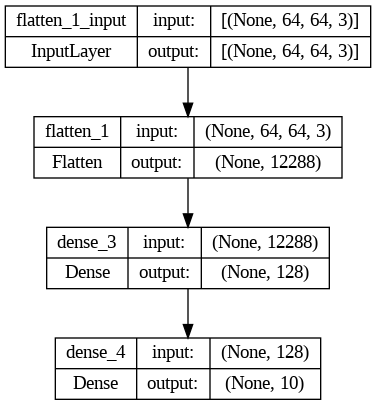

In [10]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [11]:
history = model.fit(X_train, y_train, 
                    epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


422/422 [==============================] - 3s 4ms/step - loss: 2.4715 - accuracy: 0.1080
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3104 - accuracy: 0.1050
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 2.3105 - accuracy: 0.1066
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3104 - accuracy: 0.1092
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3117 - accuracy: 0.1093
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3111 - accuracy: 0.1071
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3104 - accuracy: 0.1111
Epoch 8/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3109 - accuracy: 0.1087
Epoch 9/10
422/422 [==============================] - 2s 4ms/step - loss: 2.3099 - accuracy: 0.1141
Epoch 10/10
422/422 [==============================] - 2s 5ms/step - loss: 2.3108 - accuracy: 0.1063


In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

422/422 - 1s - loss: 2.2971 - accuracy: 0.1111 - 1s/epoch - 3ms/step

Test accuracy: 0.1111111119389534


### Второй подход(на самом деле где-то 13-ый, менял слои-ковырялся в одной ячейке)

In [13]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(layers.Flatten(input_shape=(64, 64, 3)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100)

Epoch 1/100
422/422 [==============================] - 11s 19ms/step - loss: 0.9606 - accuracy: 0.6536 - val_loss: 2.3777 - val_accuracy: 0.2588
Epoch 2/100
422/422 [==============================] - 7s 16ms/step - loss: 0.5851 - accuracy: 0.7939 - val_loss: 2.0930 - val_accuracy: 0.4723
Epoch 3/100
422/422 [==============================] - 7s 16ms/step - loss: 0.4337 - accuracy: 0.8458 - val_loss: 0.7878 - val_accuracy: 0.7265
Epoch 4/100
422/422 [==============================] - 6s 14ms/step - loss: 0.3251 - accuracy: 0.8857 - val_loss: 1.1649 - val_accuracy: 0.6473
Epoch 5/100
422/422 [==============================] - 7s 16ms/step - loss: 0.2400 - accuracy: 0.9170 - val_loss: 0.7390 - val_accuracy: 0.7827
Epoch 6/100
422/422 [==============================] - 7s 16ms/step - loss: 0.1794 - accuracy: 0.9401 - val_loss: 0.4787 - val_accuracy: 0.8527
Epoch 7/100
422/422 [==============================] - 7s 16ms/step - loss: 0.1378 - accuracy: 0.9534 - val_loss: 2.0772 - val_accuracy

### Попытка предсказать 1

In [19]:
uploaded=files.upload()

for fn in uploaded.keys():

    path='/content/' + fn
    # загружаем фото в "нужном" размере
    img=image.load_img(path, target_size=(64, 64))

    x=image.img_to_array(img)
    # опять расширяем размерности до тензора
    x=np.expand_dims(x, axis=0)

    classes = model.predict(x, batch_size=1)

    print(classes[0])

Saving highway.jpg to highway (3).jpg
1/1 [==============================] - 0s 38ms/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [23]:
print(label_Dict)

{0: b'AnnualCrop', 1: b'Forest', 2: b'HerbaceousVegetation', 3: b'Highway', 4: b'Industrial', 5: b'Pasture', 6: b'PermanentCrop', 7: b'Residential', 8: b'River', 9: b'SeaLake'}


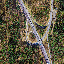

In [22]:
img

Ну почти индастриал, но это хайвей, глупая нейросеть

### Попытка предсказать 2


In [39]:
uploaded=files.upload()

for fn in uploaded.keys():

    path='/content/' + fn
    # загружаем фото в "нужном" размере
    img=image.load_img(path, target_size=(64, 64))

    x=image.img_to_array(img)
    # опять расширяем размерности до тензора
    x=np.expand_dims(x, axis=0)

    classes = model.predict(x, batch_size=1)

    print(classes[0])

Saving residential.png to residential (1).png
1/1 [==============================] - 0s 36ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [29]:
print(label_Dict)

{0: b'AnnualCrop', 1: b'Forest', 2: b'HerbaceousVegetation', 3: b'Highway', 4: b'Industrial', 5: b'Pasture', 6: b'PermanentCrop', 7: b'Residential', 8: b'River', 9: b'SeaLake'}


Предсказано residential, поищем что-нибудь в исходном датасете чтобы сравнить

7
b'Residential'


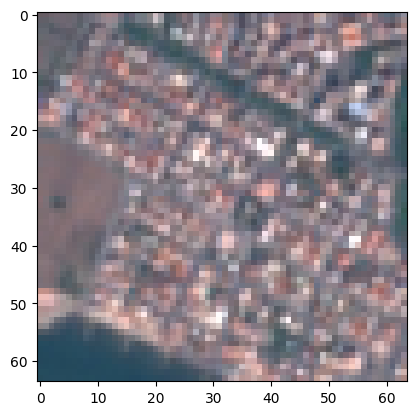

In [38]:
for i in range(len(yLabels)):
  if yLabels[i] == 7:
    image_test = XImages[i]

    print(yLabels[i])
    print(label_names[yLabels[i]])
    plt.imshow(image_test);
    break;

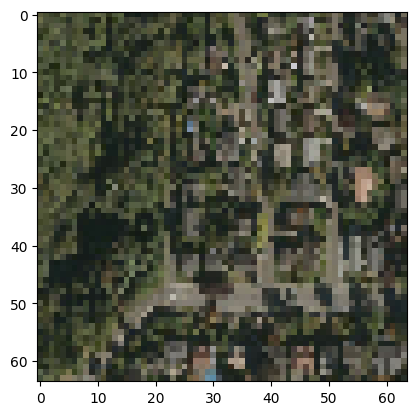

In [40]:
plt.imshow(img)

И там и там здания, похоже на правду

## Дообучение готовой модели

Нагло украдено и допилено под свой набор отсюда - https://towardsdatascience.com/fine-tuning-pre-trained-model-vgg-16-1277268c537f

In [6]:
X_train, X_test, y_train, y_test = train_test_split(XImages, yLabels, test_size=0.2, random_state=137)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=137) # 0.25 x 0.8 = 0.2

In [7]:
from keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3)) #скачиваем модель

# морозим последние 3 конв слоя и последний пуллинговый слой
for layer in vgg_model.layers[:15]:
    layer.trainable = False
# смотрим че заморозилось
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

# Добавляем свои приколы
x = vgg_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
transfer_model =tf.keras.Model(inputs=vgg_model.input, outputs=x)

58889256/58889256 [==============================] - 1s 0us/step
0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Какие-то приколы чтобы сохранять модель, каждый раз когда увеличивается скор при предсказании на тестовой выборке и менять lr если за 3 эпох скор не импрувнулся

In [8]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1, mode="auto", min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'auto', save_best_only = True, verbose= 1)

Само обучение

In [9]:
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 5e-5
transfer_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=["accuracy"])
history = transfer_model.fit(X_train, y_train, batch_size = 32, epochs=20, validation_data=(X_val,y_val), callbacks=[lr_reduce,checkpoint])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


507/507 [==============================] - ETA: 0s - loss: 0.7216 - accuracy: 0.7520
Epoch 1: val_accuracy improved from -inf to 0.86907, saving model to vgg16_finetune.h15


507/507 [==============================] - 32s 38ms/step - loss: 0.7216 - accuracy: 0.7520 - val_loss: 0.3916 - val_accuracy: 0.8691 - lr: 5.0000e-05
Epoch 2/20
505/507 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.8836
Epoch 2: val_accuracy improved from 0.86907 to 0.89907, saving model to vgg16_finetune.h15


507/507 [==============================] - 17s 34ms/step - loss: 0.3526 - accuracy: 0.8835 - val_loss: 0.3030 - val_accuracy: 0.8991 - lr: 5.0000e-05
Epoch 3/20
506/507 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9125
Epoch 3: val_accuracy did not improve from 0.89907
507/507 [==============================] - 15s 29ms/step - loss: 0.2703 - accuracy: 0.9125 - val_loss: 0.3059 - val_accuracy: 0.8989 - lr: 5.0000e-05
Epoch 4/20
506/507 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9265
Epoch 4: val_accuracy did not improve from 0.89907
507/507 [==============================] - 15s 30ms/step - loss: 0.2197 - accuracy: 0.9265 - val_loss: 0.3711 - val_accuracy: 0.8700 - lr: 5.0000e-05
Epoch 5/20
506/507 [============================>.] - ETA: 0s - loss: 0.1725 - accuracy: 0.9437
Epoch 5: val_accuracy improved from 0.89907 to 0.91130, saving model to vgg16_finetune.h15


507/507 [==============================] - 18s 35ms/step - loss: 0.1727 - accuracy: 0.9436 - val_loss: 0.2911 - val_accuracy: 0.9113 - lr: 5.0000e-05
Epoch 6/20
505/507 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 0.9515
Epoch 6: val_accuracy improved from 0.91130 to 0.91667, saving model to vgg16_finetune.h15


507/507 [==============================] - 17s 34ms/step - loss: 0.1483 - accuracy: 0.9517 - val_loss: 0.2868 - val_accuracy: 0.9167 - lr: 5.0000e-05
Epoch 7/20
505/507 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9606
Epoch 7: val_accuracy did not improve from 0.91667
507/507 [==============================] - 15s 29ms/step - loss: 0.1178 - accuracy: 0.9604 - val_loss: 0.3322 - val_accuracy: 0.9137 - lr: 5.0000e-05
Epoch 8/20
507/507 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9641
Epoch 8: val_accuracy improved from 0.91667 to 0.91907, saving model to vgg16_finetune.h15


507/507 [==============================] - 18s 35ms/step - loss: 0.1041 - accuracy: 0.9641 - val_loss: 0.2981 - val_accuracy: 0.9191 - lr: 5.0000e-05
Epoch 9/20
506/507 [============================>.] - ETA: 0s - loss: 0.0808 - accuracy: 0.9739
Epoch 9: val_accuracy improved from 0.91907 to 0.92037, saving model to vgg16_finetune.h15


507/507 [==============================] - 18s 35ms/step - loss: 0.0808 - accuracy: 0.9739 - val_loss: 0.3154 - val_accuracy: 0.9204 - lr: 5.0000e-05
Epoch 10/20
505/507 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9756
Epoch 10: val_accuracy did not improve from 0.92037
507/507 [==============================] - 15s 30ms/step - loss: 0.0753 - accuracy: 0.9756 - val_loss: 0.3274 - val_accuracy: 0.9180 - lr: 5.0000e-05
Epoch 11/20
507/507 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9783
Epoch 11: val_accuracy did not improve from 0.92037
507/507 [==============================] - 17s 34ms/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.4454 - val_accuracy: 0.8994 - lr: 5.0000e-05
Epoch 12/20
506/507 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9750
Epoch 12: val_accuracy improved from 0.92037 to 0.92056, saving model to vgg16_finetune.h15


507/507 [==============================] - 17s 34ms/step - loss: 0.0735 - accuracy: 0.9751 - val_loss: 0.3463 - val_accuracy: 0.9206 - lr: 5.0000e-05
Epoch 13/20
505/507 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9796
Epoch 13: val_accuracy improved from 0.92056 to 0.92259, saving model to vgg16_finetune.h15


507/507 [==============================] - 18s 35ms/step - loss: 0.0600 - accuracy: 0.9796 - val_loss: 0.3597 - val_accuracy: 0.9226 - lr: 5.0000e-05
Epoch 14/20
506/507 [============================>.] - ETA: 0s - loss: 0.0470 - accuracy: 0.9851
Epoch 14: val_accuracy did not improve from 0.92259
507/507 [==============================] - 15s 29ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.4276 - val_accuracy: 0.9133 - lr: 5.0000e-05
Epoch 15/20
506/507 [============================>.] - ETA: 0s - loss: 0.0460 - accuracy: 0.9850
Epoch 15: val_accuracy did not improve from 0.92259
507/507 [==============================] - 15s 29ms/step - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.3772 - val_accuracy: 0.9200 - lr: 5.0000e-05
Epoch 16/20
505/507 [============================>.] - ETA: 0s - loss: 0.0527 - accuracy: 0.9837
Epoch 16: val_accuracy did not improve from 0.92259
507/507 [==============================] - 15s 29ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 

507/507 [==============================] - 20s 40ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.3920 - val_accuracy: 0.9230 - lr: 5.0000e-05
Epoch 19/20
507/507 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9901
Epoch 19: val_accuracy did not improve from 0.92296
507/507 [==============================] - 15s 29ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.4700 - val_accuracy: 0.9154 - lr: 5.0000e-05
Epoch 20/20
506/507 [============================>.] - ETA: 0s - loss: 0.0382 - accuracy: 0.9878
Epoch 20: val_accuracy did not improve from 0.92296
507/507 [==============================] - 15s 29ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.4152 - val_accuracy: 0.9194 - lr: 5.0000e-05


Надо бы как крутые дс порисовать графики

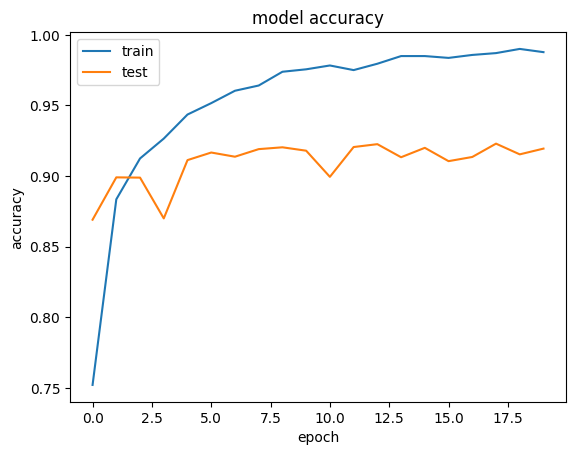

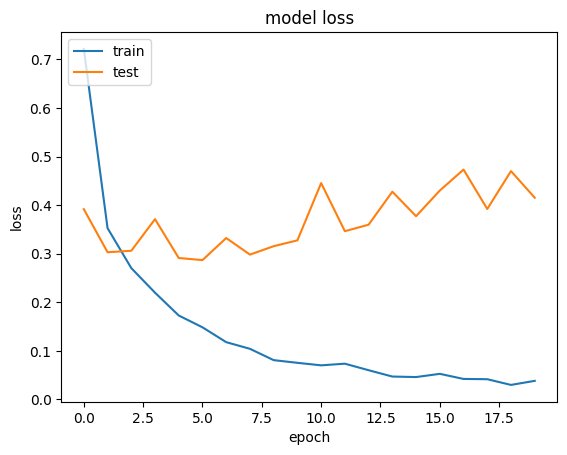

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10 эпох хватало, может если поиграться с лр может получиться импрувнуть, но ноутбук при повторном обучении точно упадёт из-за ОЗУ

## Попытка предсказать чего-нибудь на новых данных

Набор данных выб

In [21]:
def plot_confusion_matrix(y_true,y_predict,labels):
    confusion_mtx = tf.math.confusion_matrix(y_true, y_predict,) 
    confusion_mtx=np.round(confusion_mtx/np.sum(confusion_mtx,axis=1),2)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=labels, yticklabels=labels, 
                annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    return confusion_mtx

In [12]:
prediction = transfer_model.predict(X_test)
prediction[0]

169/169 [==============================] - 3s 17ms/step


array([1.6505621e-01, 5.4352550e-04, 8.2019955e-01, 3.1824294e-03,
       5.3269698e-05, 1.3853874e-03, 4.8286570e-03, 2.3989489e-04,
       4.1461345e-03, 3.6489114e-04], dtype=float32)

In [13]:
probability_model = tf.keras.Sequential([transfer_model, 
                                         tf.keras.layers.Softmax()])
prediction = probability_model.predict(X_test)
prediction[0]

169/169 [==============================] - 3s 14ms/step


array([0.10287315, 0.087268  , 0.19807385, 0.08749859, 0.08722523,
       0.08734151, 0.08764276, 0.08724152, 0.08758297, 0.08725242],
      dtype=float32)

In [ ]:
print(label_Dict)

In [42]:
target_names = np.array([i for i in label_Dict.values()])
target_names

array([b'AnnualCrop', b'Forest', b'HerbaceousVegetation', b'Highway',
       b'Industrial', b'Pasture', b'PermanentCrop', b'Residential',
       b'River', b'SeaLake'], dtype='|S20')

In [19]:
label_predict=np.argmax(prediction,axis=1)
target_names[label_predict[0]]

b'HerbaceousVegetation'

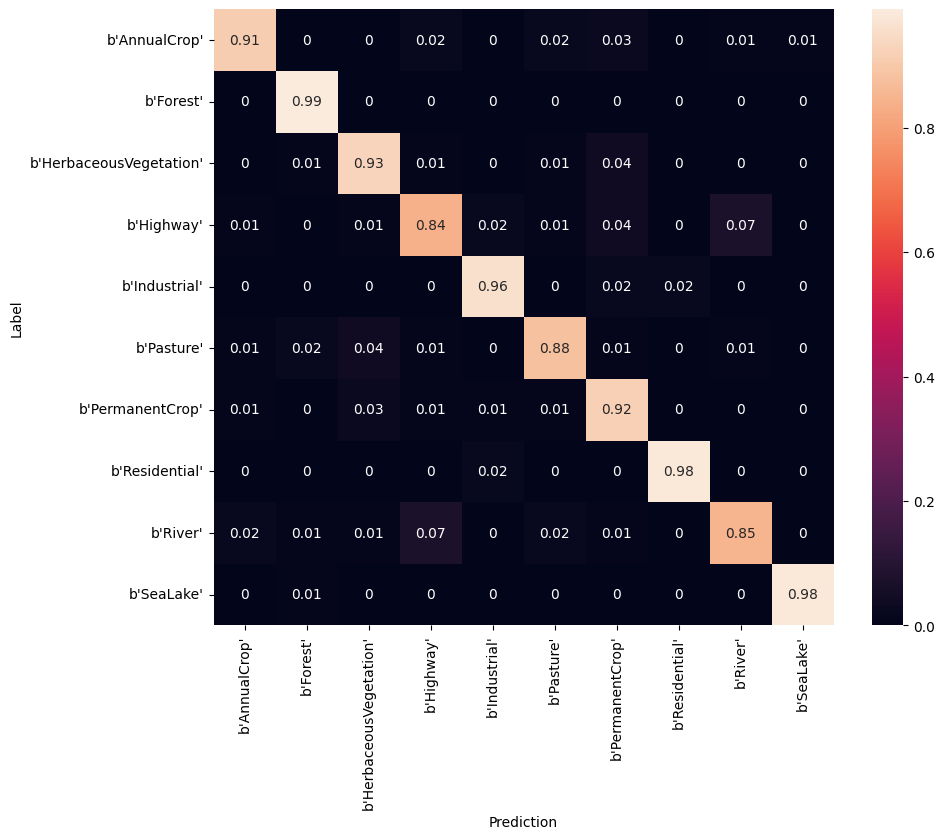

In [24]:
cm=plot_confusion_matrix(y_test,label_predict,target_names)

Плохо предсказываются highway, pasture и river

Посмотрим глазами нейросети

In [39]:
label_predict=np.argmax(prediction,axis=1)
target_names[label_predict[1]]

b'Forest'

Text(0.5, 1.0, "b'Forest'")

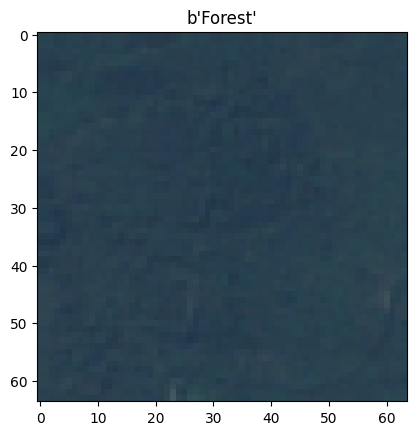

In [40]:
plt.imshow(X_test[1])
plt.title(target_names[y_test[1]])

In [43]:
target_names[np.argsort(prediction[1])[::-1]]

array([b'Forest', b'HerbaceousVegetation', b'Pasture', b'Residential',
       b'SeaLake', b'PermanentCrop', b'River', b'AnnualCrop', b'Highway',
       b'Industrial'], dtype='|S20')

Странно, я бы сказал что тут что-то водное, а river и sealake далеко по предиктам

Вычисляем где нейросеть не смогла предсказать Highway

In [69]:
for i in range(len(label_predict)):
  if str(target_names[label_predict[i]]) == "b'Highway'" and str(target_names[label_predict[i]]) != str(target_names[y_test[i]]):
    print(i)

43
106
145
167
227
295
442
740
979
1173
1267
1272
1330
1374
1397
1486
1491
1516
1560
1597
1611
1672
1720
1946
2030
2057
2060
2086
2118
2171
2180
2198
2328
2338
2478
2558
2577
3328
3566
3636
3681
3718
3768
3809
3831
3843
4014
4294
4314
4368
4467
4478
4531
4608
4651
4652
4681
4821
4936
5022
5135
5350


In [70]:
target_names[label_predict[5350]] # Что предсказа нейросеть

b'Highway'

Text(0.5, 1.0, "b'River'")

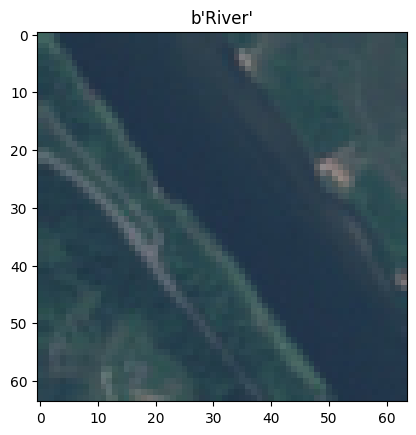

In [71]:
plt.imshow(X_test[5350])
plt.title(target_names[y_test[5350]]) #Что на самом деле

In [72]:
target_names[label_predict[5022]] # Что предсказа нейросеть

b'Highway'

Text(0.5, 1.0, "b'River'")

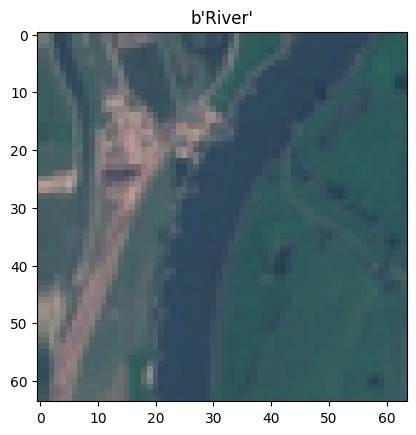

In [73]:
plt.imshow(X_test[5022])
plt.title(target_names[y_test[5022]]) #Что на самом деле

Ну пиксели дороги есть

Найдем что-нибудь из internet

In [193]:
images_from_internet = []

In [194]:
images_from_internet.append(np.asarray(Image.open('forest.jpg').resize((64, 64))).astype('uint8')/255)

In [196]:
images_from_internet = np.array(images_from_internet)

In [197]:
images_from_internet.shape

(1, 64, 64, 3)

In [198]:
x = np.asarray(Image.open('forest.jpg').resize((64, 64))).astype('uint8')/255

In [187]:
X_test[2].shape

(64, 64, 3)

In [178]:
x.shape

(64, 64, 3)

In [199]:
prediction = probability_model.predict(images_from_internet)
prediction[0]

1/1 [==============================] - 0s 25ms/step


array([0.08534916, 0.08539604, 0.2317757 , 0.08534917, 0.08534904,
       0.0853755 , 0.08535726, 0.08534902, 0.08534952, 0.08534954],
      dtype=float32)

In [200]:
label_predict=np.argmax(prediction,axis=1)
target_names[label_predict[0]]

b'HerbaceousVegetation'

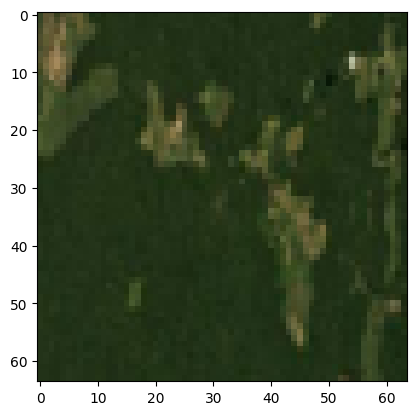

In [202]:
plt.imshow(x)

Больше похоже на лес конечно же...